# 事前準備

## import

In [20]:
import pandas as pd 
import numpy as np
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as offline

## データ読み込み

In [14]:
df_orig = pd.read_csv('/work/dataset/raw/pokemon.csv')
df_orig.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [15]:
df_orig.shape

(801, 41)

# 主成分分析

In [78]:
df_pca = pd.DataFrame({'name':df_orig.name,
'height_m':df_orig.height_m,'hp':df_orig.hp,'attack':df_orig.attack,
'sp_attack':df_orig.sp_attack,'sp_defense':df_orig.sp_defense,'speed':df_orig.speed,
'weight_kg':df_orig.weight_kg})

In [79]:
df_pca = df_pca.dropna().reset_index(drop=True)

In [80]:
df_pca.head()

,name,height_m,hp,attack,sp_attack,sp_defense,speed,weight_kg
0,Bulbasaur,0.7,45,49,65,65,45,6.9
1,Ivysaur,1.0,60,62,80,80,60,13.0
2,Venusaur,2.0,80,100,122,120,80,100.0
3,Charmander,0.6,39,52,60,50,65,8.5
4,Charmeleon,1.1,58,64,80,65,80,19.0


In [81]:
dfs = df_pca.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [82]:
#主成分分析の実行
pca = PCA()
feature = pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

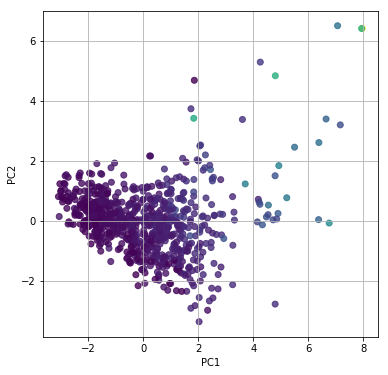

In [85]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(dfs['height_m']))
# for i,(x,y) in enumerate(zip(feature[:, 0], feature[:, 1])):
#    plt.annotate(df_pca['name'][i],(x,y))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 棒グラフの練習


## generation bar
* 問題
    * 第１世代〜第7世代のポケモンのそれぞれの数を棒グラフで表せ。
* ヒント
    * x軸の値の出し方 df_orig['generation'].value_counts().index.values
    * y軸の値の出し方 df_orig['generation'].value_counts()
* 補足
    * [ポケモンの世代について](https://wiki.xn--rckteqa2e.com/wiki/%E4%B8%96%E4%BB%A3)


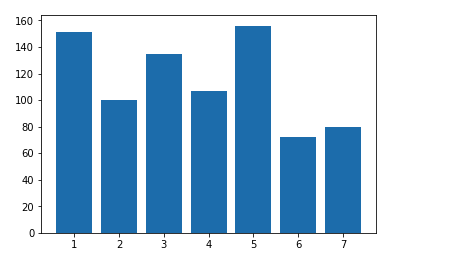

In [4]:
# 表示例
from IPython.display import Image, display_png
display(Image('/work/dataset/imgs/generation_bar.png'))

## generation bar with legend
* 問題
   * 第1世代〜第7世代の伝説ではないポケモンの数と伝説ポケモンの数をそれぞれ棒グラフで表せ。
   * ただし、一つの画像に二種類の棒グラフがあること。
* ヒント
   * x軸の出し方 df_orig.query("is_legendary=='1'")['generation'].value_counts(sort=False).index.values
   * 非伝説ポケモンの数 df_orig.query("is_legendary=='0'")['generation'].value_counts(sort=False)
   * 伝説ポケモンの数 df_orig.query("is_legendary=='1'")['generation'].value_counts(sort=False)
* 補足
   * [伝説ポケモン一覧](https://wiki.xn--rckteqa2e.com/wiki/%E4%BC%9D%E8%AA%AC%E3%81%AE%E3%83%9D%E3%82%B1%E3%83%A2%E3%83%B3)

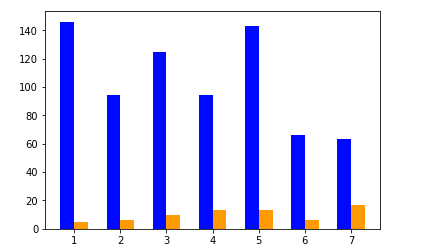

In [5]:
# 表示例
from IPython.display import Image, display_png
display(Image('/work/dataset/imgs/generation_legend_bar.png'))

# 円グラフの練習

## Legendary pokemon
* 問題
   * 伝説ポケモンと非伝説ポケモンのそれぞれの割合を円グラフで表せ。
* ヒント
   * 伝説ポケモンの数　df_orig['name'][df_orig['is_legendary']==1].count()
   * 非伝説ポケモンの数　df_orig['name'][df_orig['is_legendary']==0].count()

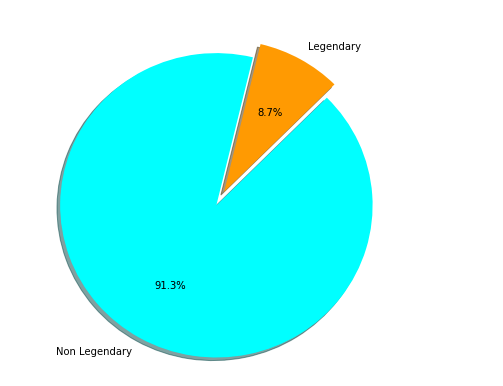

In [6]:
# 表示例
from IPython.display import Image, display_png
display(Image('/work/dataset/imgs/legend_pie.png'))

# ヒストグラムの練習

## HPの分布
* 問題
   * 各ポケモンのHPのヒストグラムを表示せよ。
* ヒント
   * なし

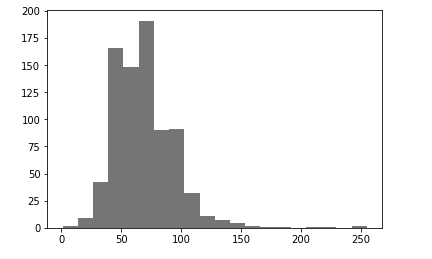

In [8]:
# 表示例
from IPython.display import Image, display_png
display(Image('/work/dataset/imgs/hp.png'))

# ヒートマップの練習

## type1 & type2 distribution
* 問題
   * type1とtype２をそれぞれ併せ持つポケモンの数を数えて、ヒートマップで表せ。
* ヒント
   * type1,type2のそれぞれの数の集計　df_orig[df_orig['type2']!='None'].groupby(['type1', 'type2']).size().unstack()

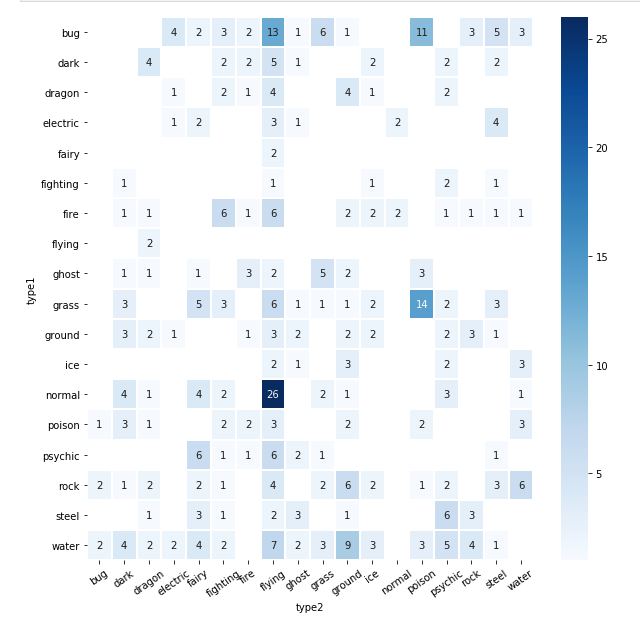

In [88]:
# 表示例
from IPython.display import Image, display_png
display(Image('/work/dataset/imgs/heatmap.png'))

In [87]:
df_orig[df_orig['type2']!='None'].groupby(['type1', 'type2']).size().unstack().head()

type2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
type1,,,,,,,,,,,,,,,,,,
bug,NaN,NaN,NaN,4.0,2.0,3.0,2.0,13.0,1.0,6.0,1.0,NaN,NaN,11.0,NaN,3.0,5.0,3.0
dark,NaN,NaN,4.0,NaN,NaN,2.0,2.0,5.0,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN
dragon,NaN,NaN,NaN,1.0,NaN,2.0,1.0,4.0,NaN,NaN,4.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
electric,NaN,NaN,NaN,1.0,2.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN
fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
